In [1]:
!nvidia-smi

Thu Aug 15 20:54:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
!pip install -q supervision roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.6 MB/s eta 0:00:00


In [4]:
!pip install --upgrade ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.0/869.0 kB 19.9 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.1.34
    Uninstalling ultralytics-8.1.34:
      Successfully uninstalled ultralytics-8.1.34


## Download dataset from Roboflow Universe

In [5]:
!pip install -q roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="pyJdTQUxOgmebewY8nb3")
project = rf.workspace("divya-lzcld").project("taco-mqclx")
version = project.version(3)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to TACO-3 in yolov9:: 100%|██████████| 12020/12020 [00:02<00:00, 5342.52it/s]


In [6]:
import ultralytics
print(ultralytics.__version__)

8.2.78


## Custom Training

In [8]:
from ultralytics import YOLO

# Load a YOLOv10 model configuration
model = YOLO('yolov10n.pt')  # build a new model from YAML

# Train the model
results = model.train(data='/content/TACO-3/data.yaml', epochs=10, imgsz=640, batch=32, plots=True)

Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/content/TACO-3/data.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

100%|██████████| 755k/755k [00:00<00:00, 19.2MB/s]


Overriding model.yaml nc=80 with nc=18

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytic

100%|██████████| 6.25M/6.25M [00:00<00:00, 107MB/s]


AMP: checks passed ✅


train: Scanning /content/TACO-3/train/labels... 4200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4200/4200 [00:02<00:00, 2056.18it/s]


train: New cache created: /content/TACO-3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/TACO-3/valid/labels... 1704 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1704/1704 [00:02<00:00, 763.41it/s]


val: New cache created: /content/TACO-3/valid/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000455, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      7.27G      2.871      12.44      2.372         19        640: 100%|██████████| 132/132 [01:29<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:18<00:00,  1.46it/s]


                   all       1704       4830      0.534     0.0363      0.024     0.0165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      7.23G      2.911      10.54      2.369         43        640: 100%|██████████| 132/132 [01:24<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:17<00:00,  1.53it/s]


                   all       1704       4830      0.461     0.0645     0.0493     0.0336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      6.71G      2.887      9.265      2.348         22        640: 100%|██████████| 132/132 [01:20<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:20<00:00,  1.33it/s]


                   all       1704       4830       0.32     0.0846     0.0561     0.0382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      6.77G       2.89        8.1      2.345         29        640: 100%|██████████| 132/132 [01:19<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:17<00:00,  1.52it/s]


                   all       1704       4830       0.21      0.115     0.0646     0.0426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      7.35G       2.81      7.081      2.282         17        640: 100%|██████████| 132/132 [01:19<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:17<00:00,  1.58it/s]


                   all       1704       4830       0.19      0.135     0.0936     0.0667

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      7.13G      2.728      6.395      2.228         18        640: 100%|██████████| 132/132 [01:21<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:17<00:00,  1.52it/s]


                   all       1704       4830      0.193      0.167      0.117     0.0841

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      7.08G      2.663      5.801      2.195         26        640: 100%|██████████| 132/132 [01:20<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:17<00:00,  1.54it/s]


                   all       1704       4830      0.267      0.182      0.126     0.0925

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      6.73G      2.581      5.352      2.148         30        640: 100%|██████████| 132/132 [01:22<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:17<00:00,  1.52it/s]


                   all       1704       4830      0.278      0.199      0.139      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      7.19G      2.522       4.94      2.121         16        640: 100%|██████████| 132/132 [01:19<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:16<00:00,  1.59it/s]


                   all       1704       4830       0.32       0.21      0.161       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      6.82G      2.441      4.626      2.069         17        640: 100%|██████████| 132/132 [01:20<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:17<00:00,  1.57it/s]


                   all       1704       4830      0.316      0.219      0.168      0.128

10 epochs completed in 0.293 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.8MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.8MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2,701,436 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:23<00:00,  1.17it/s]


                   all       1704       4830      0.318       0.22      0.168      0.127
        Aluminium foil         48         62      0.282      0.339      0.259      0.221
                Bottle        347        459      0.278      0.571      0.377      0.282
            Bottle cap        275        320      0.387      0.356      0.286      0.189
          Broken glass         13        123          1          0          0          0
                   Can        187        267      0.391      0.509       0.44       0.35
                Carton        207        263      0.278      0.407      0.257      0.204
             Cigarette        223        565      0.251     0.0497     0.0475     0.0186
                   Cup        162        186      0.283      0.366       0.23      0.181
                   Lid         82         93      0.232     0.0753     0.0943     0.0757
          Other litter        148        178      0.204      0.107     0.0739     0.0602
         Other plasti

In [9]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [10]:
%cd {HOME}

/content


In [11]:
from IPython.display import Image

/content


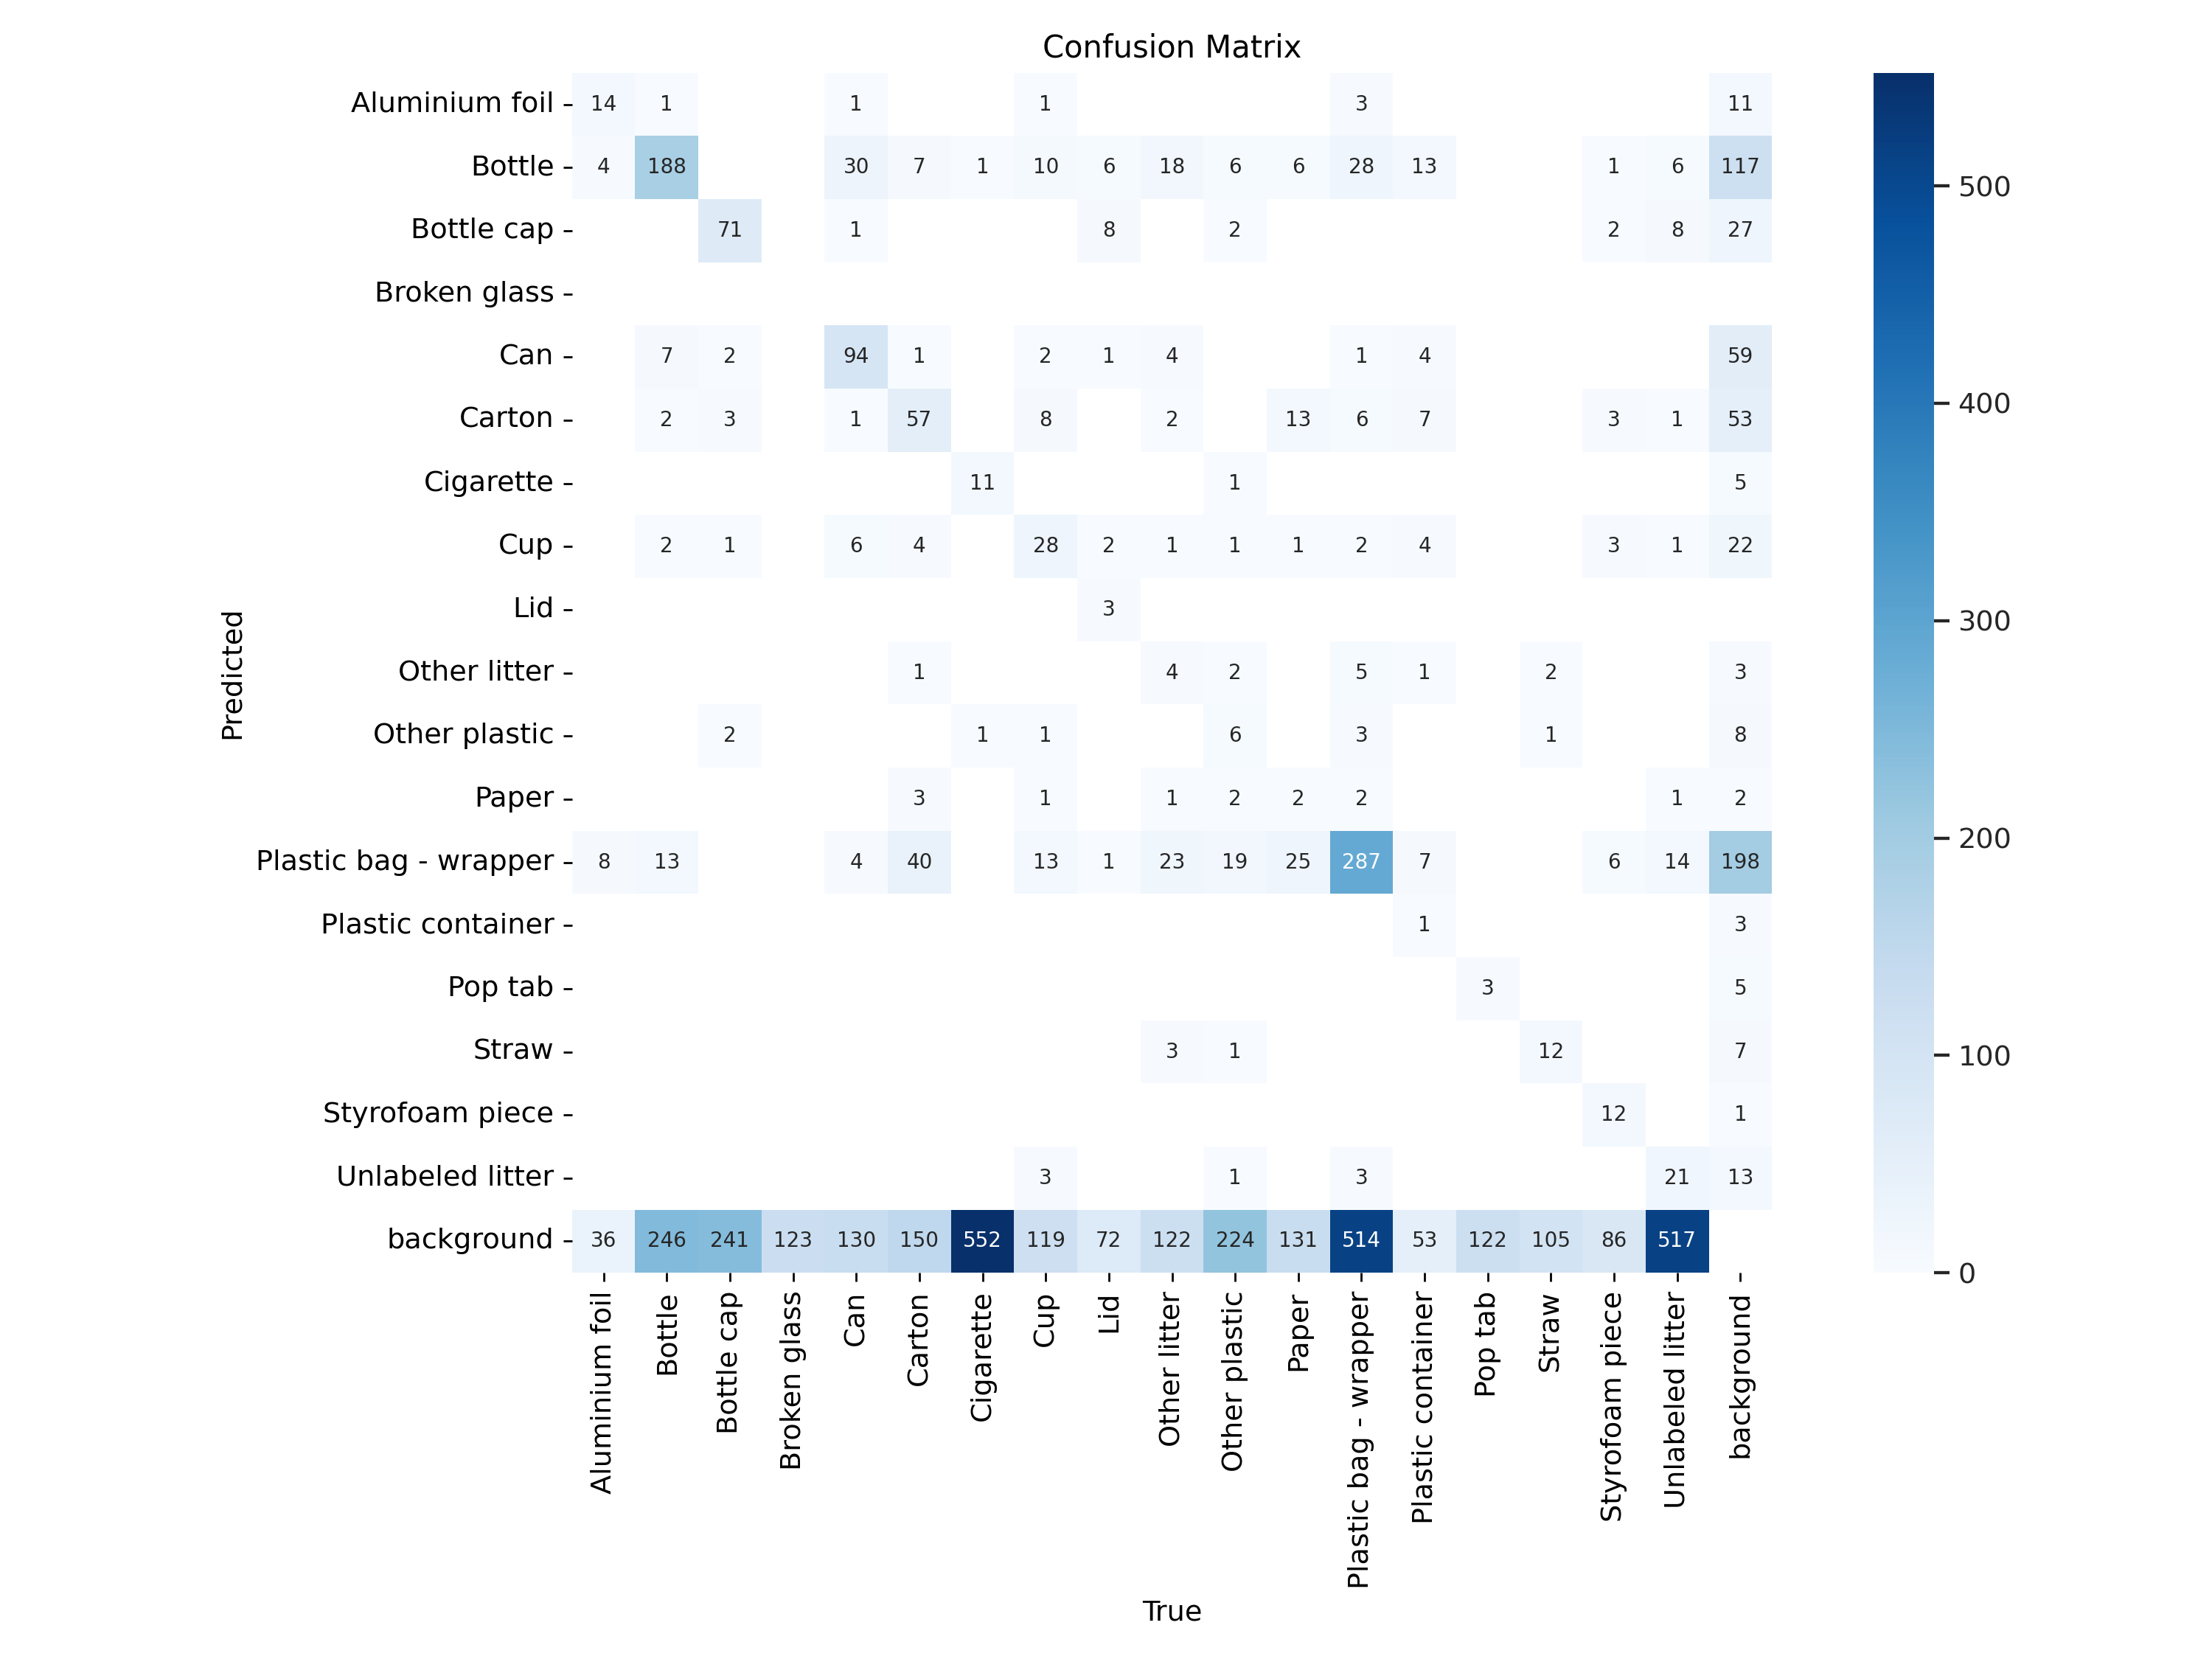

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


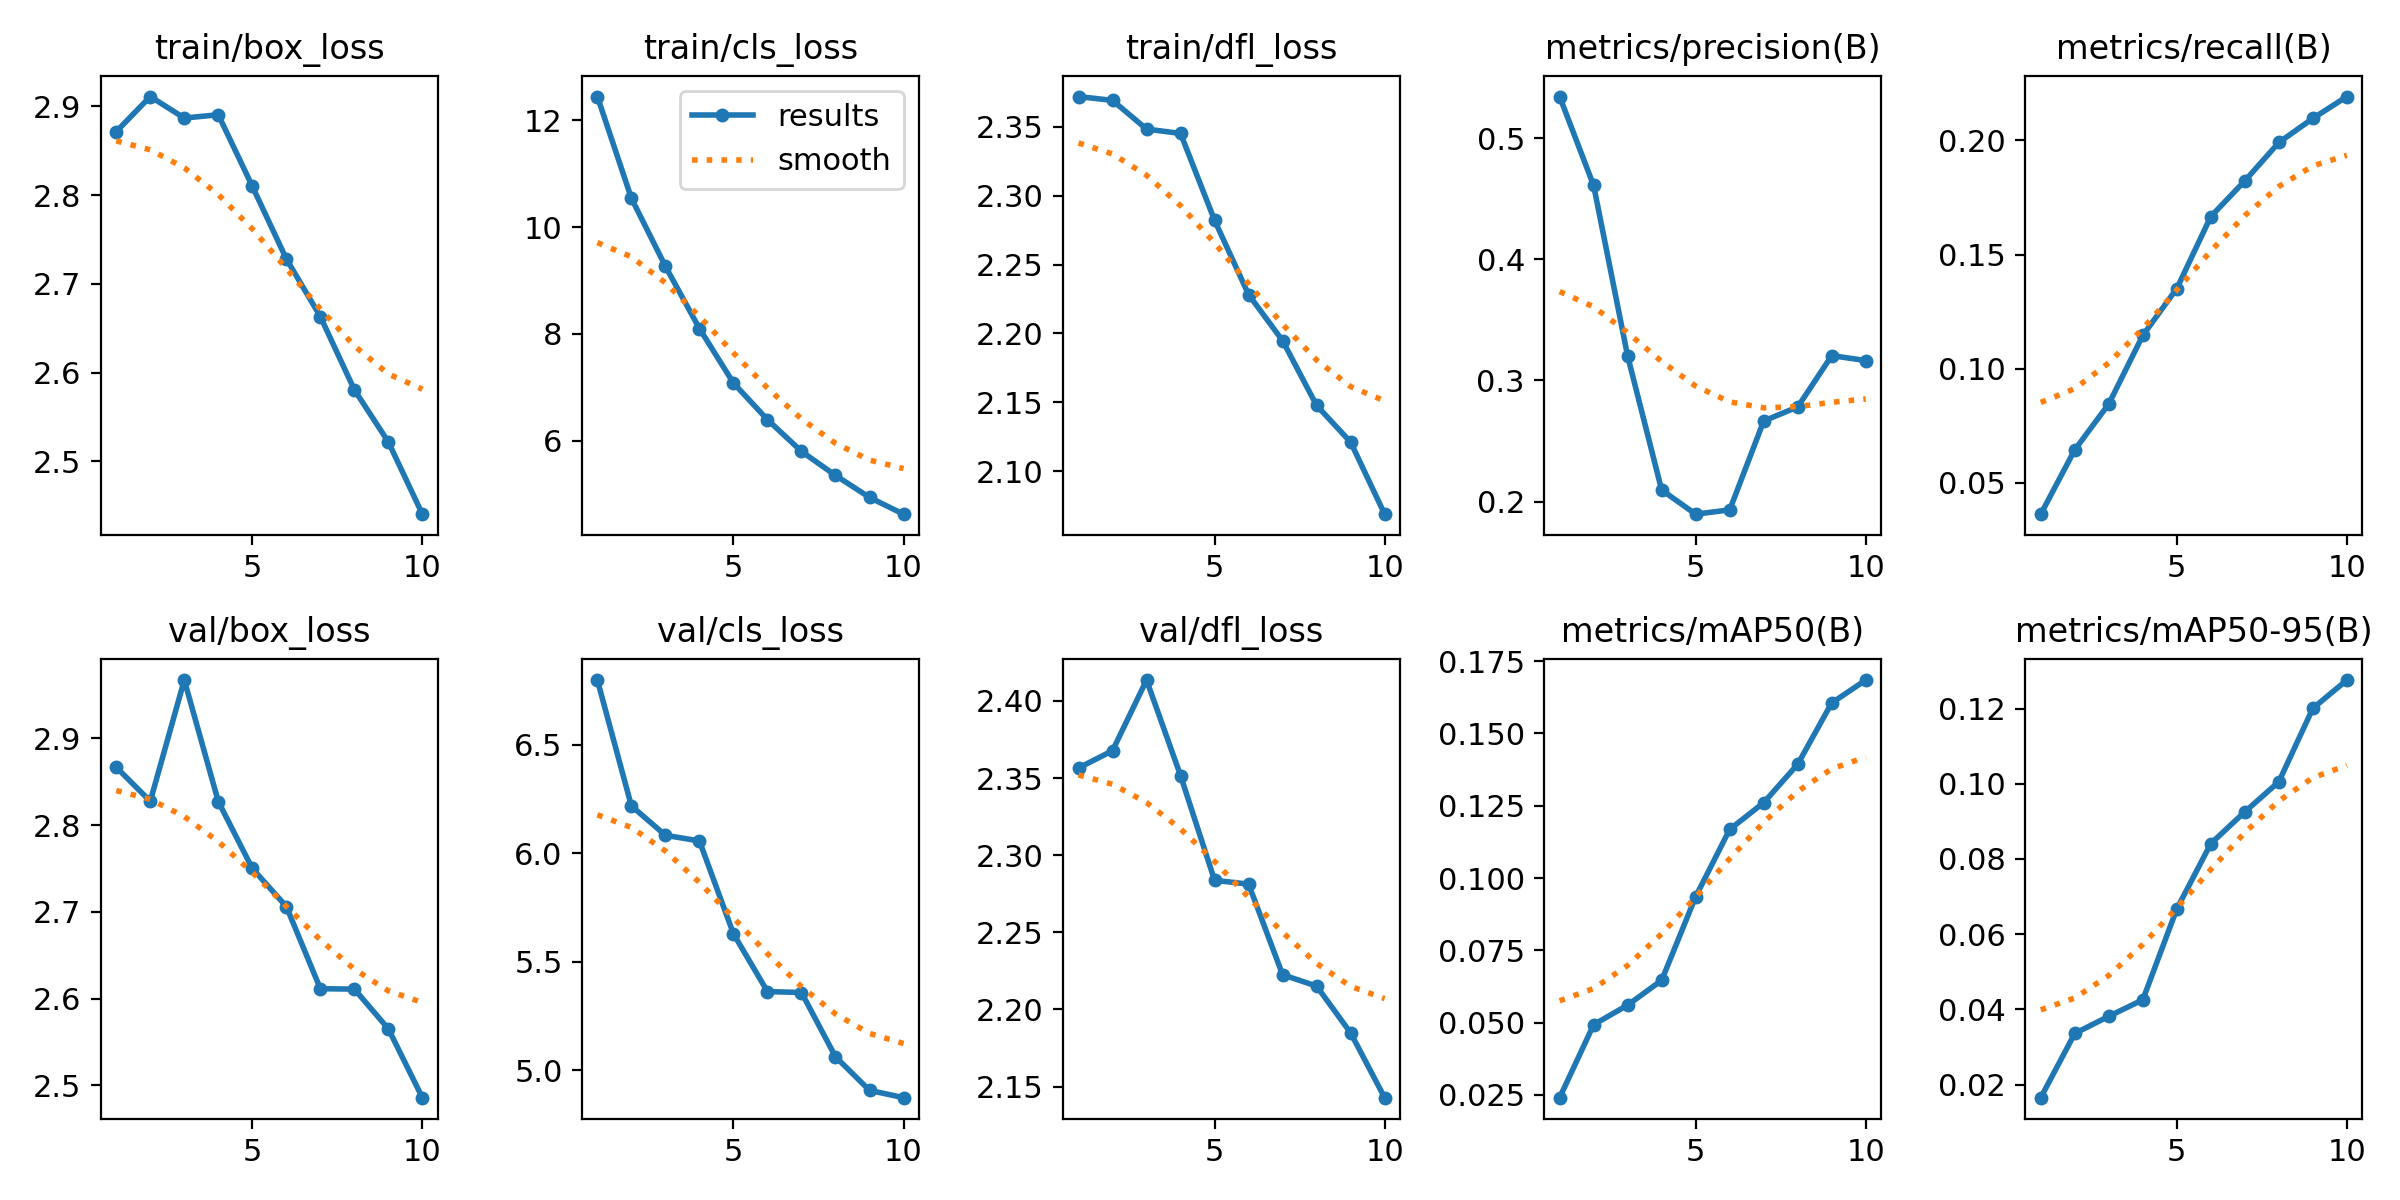

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

## Inference with Custom Model

**NOTE:** Let's start by loading our newly trained model.

In [16]:
import ultralytics
print(ultralytics.__version__)

8.2.78


In [17]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/runs/detect/train2/weights/best.pt')

# Validate the model
metrics = model.val()
print(metrics.box.map)  # mAP50-95

Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2,701,436 parameters, 0 gradients, 8.3 GFLOPs


val: Scanning /content/TACO-3/valid/labels.cache... 1704 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1704/1704 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 107/107 [00:21<00:00,  5.01it/s]


                   all       1704       4830      0.318       0.22      0.169      0.127
        Aluminium foil         48         62      0.283      0.339      0.259      0.222
                Bottle        347        459      0.278      0.571      0.377      0.282
            Bottle cap        275        320      0.388      0.356      0.287      0.188
          Broken glass         13        123          1          0          0          0
                   Can        187        267      0.394      0.513       0.44      0.349
                Carton        207        263      0.278      0.407      0.256      0.204
             Cigarette        223        565      0.252     0.0496     0.0493     0.0189
                   Cup        162        186      0.284      0.366       0.23      0.181
                   Lid         82         93      0.222     0.0707     0.0942     0.0754
          Other litter        148        178      0.204      0.107     0.0739     0.0602
         Other plasti

In [19]:
from ultralytics import YOLO

import supervision as sv

model = YOLO(f'{HOME}/runs/detect/train2/weights/best.pt')

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/valid/images",
    annotations_directory_path=f"{dataset.location}/valid/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


**NOTE:** Let's randomly select an image from our validation set and visualize the results.

SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.
SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.


<class 'numpy.ndarray'>

0: 640x640 1 Carton, 1 Plastic bag - wrapper, 19.4ms
Speed: 5.6ms preprocess, 19.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


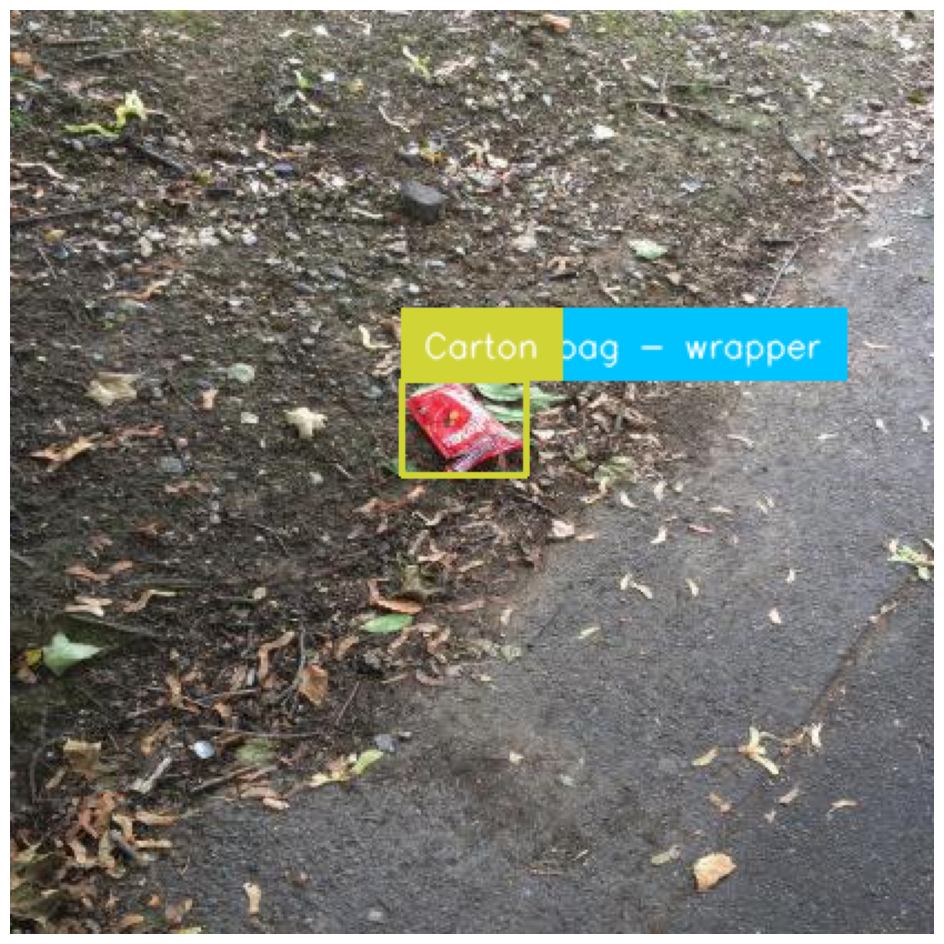

In [26]:
import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]
print(type(random_image))

results = model(source=random_image, conf=0.15)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)


0: 448x640 1 Bottle, 2 Cartons, 1 Cup, 2 Papers, 1 Plastic bag - wrapper, 1 Styrofoam piece, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)
Detections(xyxy=array([[     275.24,      196.98,      343.45,      245.43],
       [     398.42,      183.25,      606.16,      325.67],
       [     275.83,      196.69,      343.86,      246.38],
       [     275.24,      196.98,      343.45,      245.43],
       [     275.24,      196.98,      343.45,      245.43],
       [     275.24,      196.98,      343.45,      245.43],
       [     275.83,      196.69,      343.86,      246.38],
       [     275.83,      196.69,      343.86,      246.38]], dtype=float32), mask=None, confidence=array([    0.46454,     0.28265,     0.18359,     0.18266,     0.13718,    0.056254,    0.053425,    0.052953], dtype=float32), class_id=array([ 5,  1,  5, 12,  7, 11, 16, 11]), tracker_id=None, data={'class_name': array(['Carton', 'Bottle', 'Carton', 'Plasti

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


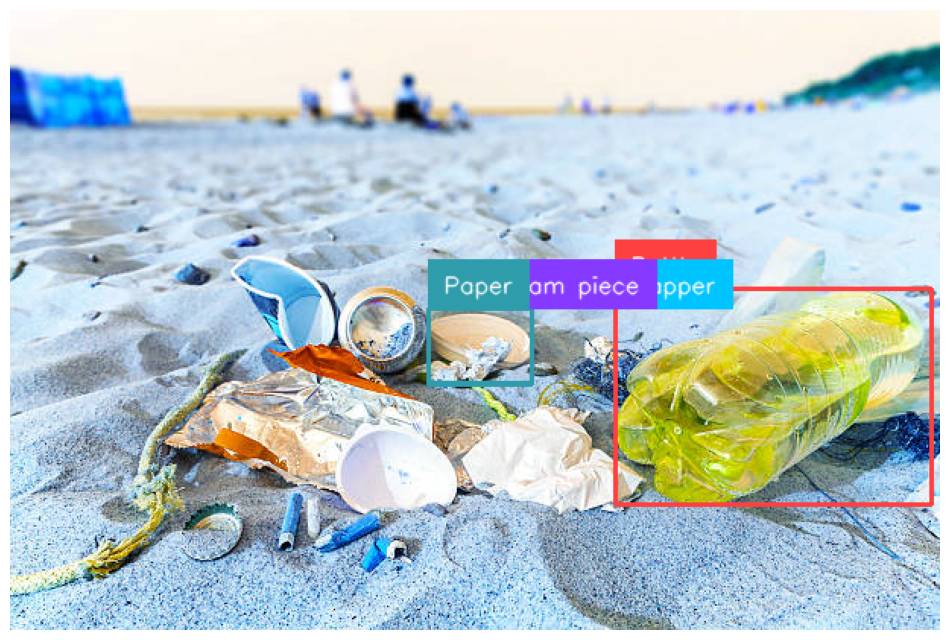

In [33]:
import numpy as np
from ultralytics import YOLO
import cv2
import supervision as sv

# Load the trained model
model = YOLO('/content/runs/detect/train2/weights/best.pt')

# Path to the image
image_path = '/content/istockphoto-480409172-612x612.jpg'

# Read the image using cv2
image_array = cv2.imread(image_path)
image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Predict on the image
# # results = model(source=random_image, conf=0.15)[0]
results = model(image_array, conf=0.05)
results[0].show()

# Create Detections object
detections = sv.Detections.from_ultralytics(results[0])
print(detections)

# Create annotators
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

# Annotate the image
annotated_image = bounding_box_annotator.annotate(
    scene=image_array, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

# Plot the annotated image
sv.plot_image(annotated_image)